In [1]:
import pyBigWig

In [2]:
import numpy as np
import gzip
with gzip.open('chr1.uint8.unique.gz', 'rb') as tmp_uMap:
    uMapdata = np.frombuffer(tmp_uMap.read(), dtype=np.uint8)

pos_vec = (uMapdata>0)&(uMapdata<=101)
pos_vec = pos_vec.astype(int)
neg_vec = np.roll(pos_vec, 100)
neg_vec[0:100] = 0

print(set(pos_vec))
print(len(uMapdata))
print(sum(pos_vec))

total_map=pos_vec+neg_vec
mappability = [sum(total_map[i:i+100])/200 for i in range(557,248956357, 100)]


{0, 1}
248956422
219161958


In [3]:
pred_bigwig = pyBigWig.open("572M_wo_bias.bw","r")
all_val = np.nan_to_num(pred_bigwig.values('chr1', 0, 248956422))
atac_500m = [sum(all_val[i:i+100]) for i in range(557,248956357, 100)]
pred_bigwig.chroms()['chr1']

248956422

In [4]:
pred_bigwig = pyBigWig.open("250M_wo_bias.bw","r")
all_val = np.nan_to_num(pred_bigwig.values('chr1', 0, 248956422))
atac_250m = [sum(all_val[i:i+100]) for i in range(557,248956357, 100)]
pred_bigwig.chroms()['chr1']

248956422

In [5]:
pred_bigwig = pyBigWig.open("100M_wo_bias.bw","r")
all_val = np.nan_to_num(pred_bigwig.values('chr1', 0, 248956422))
atac_100m = [sum(all_val[i:i+100]) for i in range(557,248956357, 100)]
pred_bigwig.chroms()['chr1']

248956422

In [6]:
pred_bigwig = pyBigWig.open("50M_wo_bias.bw","r")
all_val = np.nan_to_num(pred_bigwig.values('chr1', 0, 248956422))
atac_50m = [sum(all_val[i:i+100]) for i in range(557,248956357, 100)]
pred_bigwig.chroms()['chr1']

248956422

In [7]:
pred_bigwig = pyBigWig.open("25M_wo_bias.bw","r")
all_val = np.nan_to_num(pred_bigwig.values('chr1', 0, 248956422))
atac_25m = [sum(all_val[i:i+100]) for i in range(557,248956357, 100)]
pred_bigwig.chroms()['chr1']

248956422

In [8]:
pred_bigwig = pyBigWig.open("5M_wo_bias.bw","r")
all_val = np.nan_to_num(pred_bigwig.values('chr1', 0, 248956422))
atac_5m = [sum(all_val[i:i+100]) for i in range(557,248956357, 100)]
pred_bigwig.chroms()['chr1']

248956422

In [9]:

pred_bigwig = pyBigWig.open("GM12878_wo_bias.bw","r")
all_val = np.nan_to_num(pred_bigwig.values('chr1', 0, 248956422))
dnase = [sum(all_val[i:i+100]) for i in range(557,248956357, 100)]
pred_bigwig.chroms()['chr1']

248956422

In [10]:
len(mappability)

2489558

In [11]:
len(atac_500m)

2489558

In [12]:
import pandas as pd

bed_annotate = "/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/auprc_curves/idr_overlap_peak_blacklist_annotated_chr1.bed"
chr1_binned = pd.read_csv(bed_annotate, sep="\t", names=["chr", "start", "end", "idr", "idr_f", "idr_t", "idr_w", "idr_frac", 
                                                         "bkt", "op"])
chr1_binned = chr1_binned[:-1]
print(chr1_binned.shape)

chr1_binned["mappability"] = mappability
chr1_binned["label"] = 0
chr1_binned.loc[chr1_binned["idr"]==1, "label"] =1
print(sum(chr1_binned["label"]))

(2489558, 10)
74758


In [13]:
chr1_binned["atac_500m"] = atac_500m
chr1_binned["atac_250m"] = atac_250m
chr1_binned["atac_100m"] = atac_100m
chr1_binned["atac_50m"] = atac_50m
chr1_binned["atac_25m"] = atac_25m
chr1_binned["atac_5m"] = atac_5m
chr1_binned["dnase_68m"] = dnase

In [14]:
chr1_binned=chr1_binned[chr1_binned["bkt"]==0]


In [15]:
chr1_binned.head()

,chr,start,end,idr,idr_f,idr_t,idr_w,idr_frac,bkt,op,mappability,label,atac_500m,atac_250m,atac_100m,atac_50m,atac_25m,atac_5m,dnase_68m
0,chr1,557,657,0,0,0,100,0.0,0,0,0.0,0,2.641859,7.888051,5.603774,2.592654,0.920363,0.283895,0.062112
1,chr1,657,757,0,0,0,100,0.0,0,0,0.0,0,2.641859,7.888051,5.603774,2.592654,0.920363,0.283895,0.062112
2,chr1,757,857,0,0,0,100,0.0,0,0,0.0,0,2.641859,7.888051,5.603774,2.592654,0.920363,0.283895,0.062112
3,chr1,857,957,0,0,0,100,0.0,0,0,0.0,0,2.641859,7.888051,5.603774,2.592654,0.920363,0.283895,0.062112
4,chr1,957,1057,0,0,0,100,0.0,0,0,0.0,0,2.641859,7.888051,5.603774,2.592654,0.920363,0.283895,0.062112


In [16]:
chr1_binned = chr1_binned[~((chr1_binned["idr_frac"]>0) & (chr1_binned["idr_frac"]<0.5))]

In [17]:
chr1_binned = chr1_binned[~((chr1_binned["op"]==1) & (chr1_binned["idr"]==0))]
print(chr1_binned.shape)

(2418520, 19)


In [18]:
sum(chr1_binned["idr"]==1)

74758

In [19]:
chr1_binned = chr1_binned[chr1_binned["mappability"]>0.5]

In [20]:
import sklearn.metrics

print("ATAC 572M",np.round(sklearn.metrics.average_precision_score(chr1_binned["label"],chr1_binned["atac_500m"]),2))
print("ATAC 250M",np.round(sklearn.metrics.average_precision_score(chr1_binned["label"],chr1_binned["atac_250m"]),2))
print("ATAC 100M",np.round(sklearn.metrics.average_precision_score(chr1_binned["label"],chr1_binned["atac_100m"]),2))
print("ATAC 50M",np.round(sklearn.metrics.average_precision_score(chr1_binned["label"],chr1_binned["atac_50m"]),2))
print("ATAC 25M",np.round(sklearn.metrics.average_precision_score(chr1_binned["label"],chr1_binned["atac_25m"]),2))
print("ATAC 5M",np.round(sklearn.metrics.average_precision_score(chr1_binned["label"],chr1_binned["atac_5m"]),2))
print("DNase 68M",np.round(sklearn.metrics.average_precision_score(chr1_binned["label"],chr1_binned["dnase_68m"]),2))

rocs = []
for nameb in ["atac_500m", "atac_250m", "atac_100m", "atac_50m", "atac_25m", "atac_5m", "dnase_68m"]:
    rocs.append(np.round(sklearn.metrics.average_precision_score(chr1_binned["label"],chr1_binned[nameb]),2))


ATAC 572M 0.48
ATAC 250M 0.47
ATAC 100M 0.44
ATAC 50M 0.43
ATAC 25M 0.4
ATAC 5M 0.28
DNase 68M 0.42


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'Average Precision')

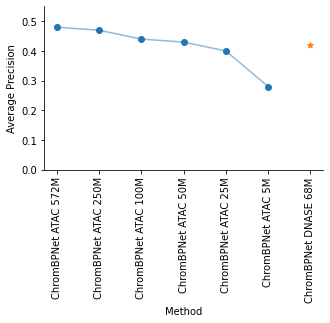

In [21]:
import matplotlib.pyplot as plt
fix, ax = plt.subplots(figsize=(5,3))
ax.scatter(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M" ,"ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],rocs[0:-1])
ax.plot(["ATAC\n572M", "ATAC\n250M", "ATAC\n100M","ATAC\n50M", "ATAC\n25M", "ATAC\n5M"],rocs[0:-1], alpha=0.5)
ax.scatter(["DNASE\n68M"], [rocs[-1]], marker="*")
xtix=["ChromBPNet ATAC 572M", " ChromBPNet ATAC 250M", "ChromBPNet ATAC 100M","ChromBPNet ATAC 50M", "ChromBPNet ATAC 25M", "ChromBPNet ATAC 5M"]+["ChromBPNet DNASE 68M"]+["Enformer DNase 68M"]+["SVM DNase 68m"]

ax.set_ylim((0,0.55))
ax.spines[["top", "right"]].set_visible(False)
ax.set_xticklabels(labels=xtix, rotation=90)
ax.set_xlabel("Method")
ax.set_ylabel("Average Precision")


In [22]:
sum(chr1_binned["label"])/chr1_binned.shape[0]

0.0340325668047457